In [1]:
import numpy as np
import matplotlib.pyplot as plt


X = np.array([[1,2], [1,4], [2,0], [4,2], [4,4], [1,1]])


class K_Means():
    def __init__(self, dataset, n_clusters = 3):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.max_n_iter = 100
        self.tolerance = .01
        self.dist_count_method = 0  # квадрат евклидова расстояния по умолчанию
        self.fitted = False
        self.labels = np.array([])
        self.centroids = np.array([np.random.randint(self.find_min_coordinates(), self.find_max_coordinates(), size=(2)) for k in range(self.n_clusters)], dtype='f')

        
    def find_min_coordinates(self):
        return self.dataset.min(axis=0)
    
    
    def find_max_coordinates(self):
        return self.dataset.max(axis=0)
        
        
    def get_dist(self, list1, list2):
        if(self.dist_count_method == 0): # квадрат евклидова расстояния
            return np.sqrt(sum((i-j)**2 for i,j in zip(list1, list2))) # для zip должна быть одинаковая размерность, иначе ошибка
        elif(self.dist_count_method == 1):  # Евклидово расстояния
            return sum((i-j)**2 for i,j in zip(list1, list2))
        elif(self.dist_count_method == 2):  # расстояние городских кварталов
            return sum(abs(i-j) for i,j in zip(list1, list2))
        elif(self.dist_count_method == 3):  # расстояние Чебышева
            return max(abs(i-j) for i,j in zip(list1, list2))  
    
    
    def select_dist_count_method(self):
        selected_method = -1
        print("Choose number:\n 0 - квадрат евклидова расстояния\n 1 - Евклидово расстояния\n 2 - расстояние городских кварталов\n 3 - расстояние Чебышева\n")
        while selected_method < 0 or selected_method > 3: 
            selected_method = int(input())
            if(0 <= selected_method <= 3):
                self.dist_count_method = selected_method
            else:
                print("Choose number:\n 0 - квадрат евклидова расстояния\n 1 - Евклидово расстояния\n 2 - расстояние городских кварталов\n 3 - расстояние Чебышева\n")
    
    
    def distribute_data(self):
        self.labels = np.array([])
        for elem in self.dataset:
            dist = [self.get_dist(elem, center) for center in self.centroids]
            self.labels = np.append(self.labels, [dist.index(min(dist))]).astype(int)
    
    
    def recalculate_centroids(self):
        for i in range(self.n_clusters):
            num = 0
            temp = np.zeros(self.dataset[0].shape)
            for k, label in enumerate(self.labels):
                if label == i:
                    temp += self.dataset[k]
                    num += 1
            self.centroids[i] = temp/num
            
    
    def fit(self):
        iter = 1
        while iter < self.max_n_iter:
            prev_centroids = np.copy(self.centroids)
            self.distribute_data()
            self.recalculate_centroids()
            if max([self.get_dist(i, k) for i,k in zip(self.centroids, prev_centroids)]) < self.tolerance:
                break
            iter += 1
        self.fitted = True  
        
    
    def predict(self, data):
        if self.fitted:
            labels_ = np.array([])
            for elem in data:
                dist = [self.get_dist(elem, center) for center in self.centroids]
                labels_ = np.append(labels_, [dist.index(min(dist))]).astype(int)
            return labels_
        else:
            print("Run K_means.fit() first") 
            return np.array([])


Choose number:
 0 - квадрат евклидова расстояния
 1 - Евклидово расстояния
 2 - расстояние городских кварталов
 3 - расстояние Чебышева

2
[1 1 0 1 1 0]
[0 1 0 1 1 0]


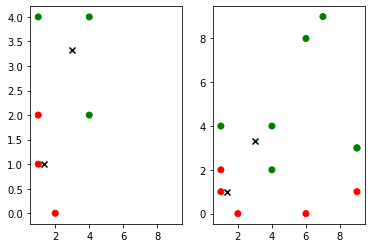

In [28]:
kmeans = K_Means(X, 2)
kmeans.select_dist_count_method()
kmeans.fit()

test_data = [np.random.randint([0, 0], [10, 10], size=(2)) for k in range(6)]
labels = kmeans.predict(test_data)
print(labels)
print(kmeans.labels)

color_list = np.array(['red', 'green', 'blue', '#ff7507', '#03560F'])

fig, axarr = plt.subplots(nrows=1, ncols=2, sharex=True)
axarr[0].scatter(X[:,0], X[:,1], c=color_list[kmeans.labels])
axarr[0].scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c='black', marker='x')
axarr[1].scatter(np.concatenate((X,test_data))[:,0], np.concatenate((X,test_data))[:,1], c=color_list[np.concatenate((kmeans.labels, labels))])
axarr[1].scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c='black', marker='x')
plt.show()

